In [65]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glob

['C:/Users/gaumu/Desktop/TEM_linux/Summaries\\2024-03-11\\run0\\train\\events.out.tfevents.1710133102.HeliosGo.204.0.v2',
 'C:/Users/gaumu/Desktop/TEM_linux/Summaries\\2024-03-12\\run10\\train\\events.out.tfevents.1710189719.LENOVO-Go.7993.0.v2',
 'C:/Users/gaumu/Desktop/TEM_linux/Summaries\\2024-03-12\\run8\\train\\events.out.tfevents.1710158269.LENOVO-Go.1513.0.v2',
 'C:/Users/gaumu/Desktop/TEM_linux/Summaries\\2024-03-12\\run9\\train\\events.out.tfevents.1710180076.LENOVO-Go.30378.0.v2']

In [90]:
logdir="C:/Users/gaumu/Desktop/TEM_linux/Summaries/"
pattern="**/**/train/*"
files = glob.glob(logdir + pattern)

In [100]:
def plot_tensorboard_values(tb_files, tag, ylabel, xlabel="Number of iterations", legend=None):
    plt.figure()
    for f in tb_files:
        event_acc = EventAccumulator(f, size_guidance={'tensors': 0})
        event_acc.Reload()
        df = pd.DataFrame(event_acc.Tensors(tag))
        df["tensor_proto"] = df["tensor_proto"].apply(tf.make_ndarray)
        plt.plot(df["step"], df["tensor_proto"])

    if legend:
        plt.legend(legend)
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

  

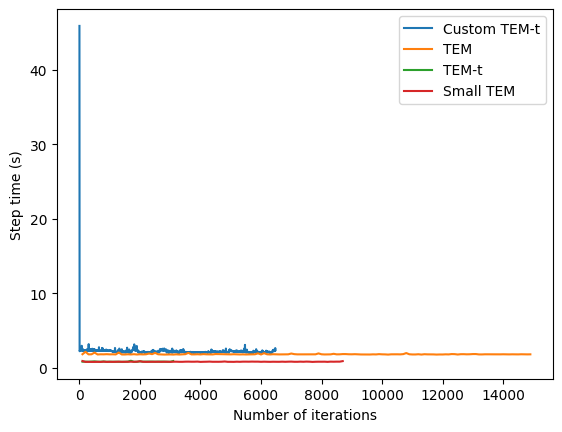

In [101]:
# plot_tensorboard_values(files, "accuracies/g")    
plot_tensorboard_values(files, 
                        "extras/model_step_time",
                        "Step time (s)")  